In [7]:
import pandas as pd

In [8]:
# Load the dataset
file_path = "billboard_2012_to_2022_top_100_song_lyrics.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Top100Year    1100 non-null   int64 
 1   SongTitle     1100 non-null   object
 2   Artist        1100 non-null   object
 3   LyricsStatus  1100 non-null   bool  
 4   Lyrics        962 non-null    object
 5   ReleaseYear   1100 non-null   object
 6   Genre         1100 non-null   object
dtypes: bool(1), int64(1), object(5)
memory usage: 52.8+ KB


(None,
    Top100Year                     SongTitle                          Artist  \
 0        2012                 Call Me Maybe                Carly Rae Jepsen   
 1        2012                      Payphone  Maroon 5 Featuring Wiz Khalifa   
 2        2012  Somebody That I Used To Know          Gotye Featuring Kimbra   
 3        2012                    Wide Awake                      Katy Perry   
 4        2012           Where Have You Been                         Rihanna   
 
    LyricsStatus                                             Lyrics  \
 0          True  I threw a wish in the well\nDon't ask me, I'll...   
 1          True  I'm at a payphone trying to call home\nAll of ...   
 2          True  Now and then I think of when we were together\...   
 3          True  I'm wide awake\nI'm wide awake\nI'm wide awake...   
 4          True  I've been everywhere, man\nLooking for someone...   
 
   ReleaseYear                                            Genre  
 0        2012   

In [9]:
# Convert ReleaseYear to numeric (some may contain non-numeric values)
df["ReleaseYear"] = pd.to_numeric(df["ReleaseYear"], errors="coerce")

# Check for missing values after conversion
df.isnull().sum()

Top100Year        0
SongTitle         0
Artist            0
LyricsStatus      0
Lyrics          138
ReleaseYear       1
Genre             0
dtype: int64

In [10]:
# Drop rows with missing ReleaseYear
df = df.dropna(subset=["ReleaseYear"])

# Extract primary genre (considering only the first genre in case of multiple genres)
df["PrimaryGenre"] = df["Genre"].apply(lambda x: x.split(",")[0] if isinstance(x, str) else x)

# Display the unique genres after processing
df["PrimaryGenre"].unique()[:10]  # Show first 10 unique genres for review


array(['R&B/Soul', 'Dance-pop', 'Alternative/Indie', 'Eurodance',
       'Electronic dance music', 'Country music', 'Pop rock', 'Rap rock',
       'Electropop', 'Dubstep'], dtype=object)

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\HOME\AppData\Local\Temp\ipykernel_15048\3131935381.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Top100Year"], palette="Purples")


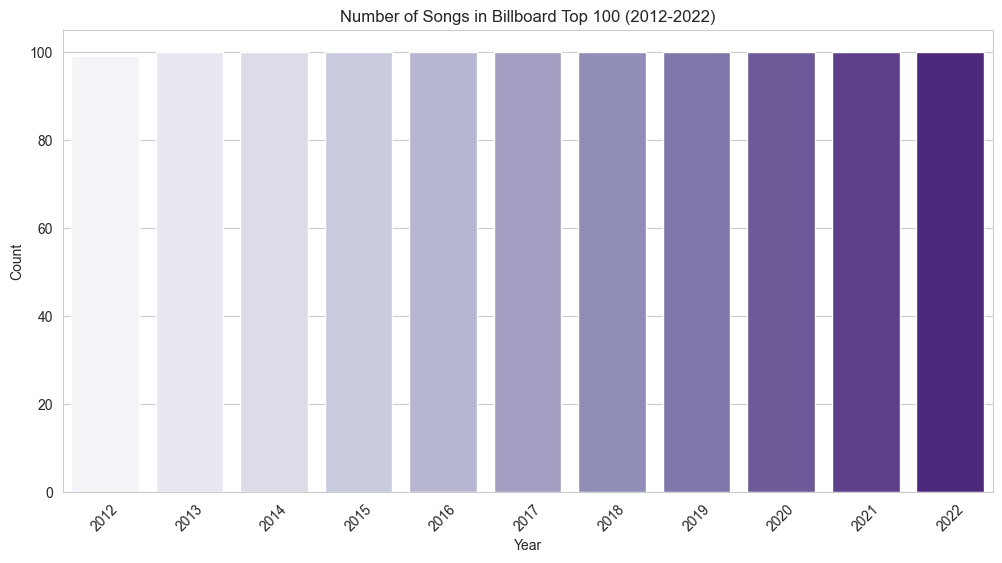

In [12]:
# Set style
sns.set_style("whitegrid")

# Count the number of songs per year
plt.figure(figsize=(12, 6))
sns.countplot(x=df["Top100Year"], palette="Purples")

plt.title("Number of Songs in Billboard Top 100 (2012-2022)")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [13]:
from textblob import TextBlob



In [14]:
# Function to compute sentiment polarity
def get_sentiment(text):
    if isinstance(text, str):
        return TextBlob(text).sentiment.polarity  # Polarity ranges from -1 (negative) to 1 (positive)
    return None

# Apply sentiment analysis on Lyrics
df["Sentiment"] = df["Lyrics"].apply(get_sentiment)

# Display sentiment statistics
df["Sentiment"].describe()

count    962.000000
mean       0.078889
std        0.165357
min       -0.700000
25%       -0.024129
50%        0.069799
75%        0.171922
max        0.731429
Name: Sentiment, dtype: float64

C:\Users\HOME\AppData\Local\Temp\ipykernel_15048\4216301792.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Top100Year"], y=df["Sentiment"], palette="Purples")


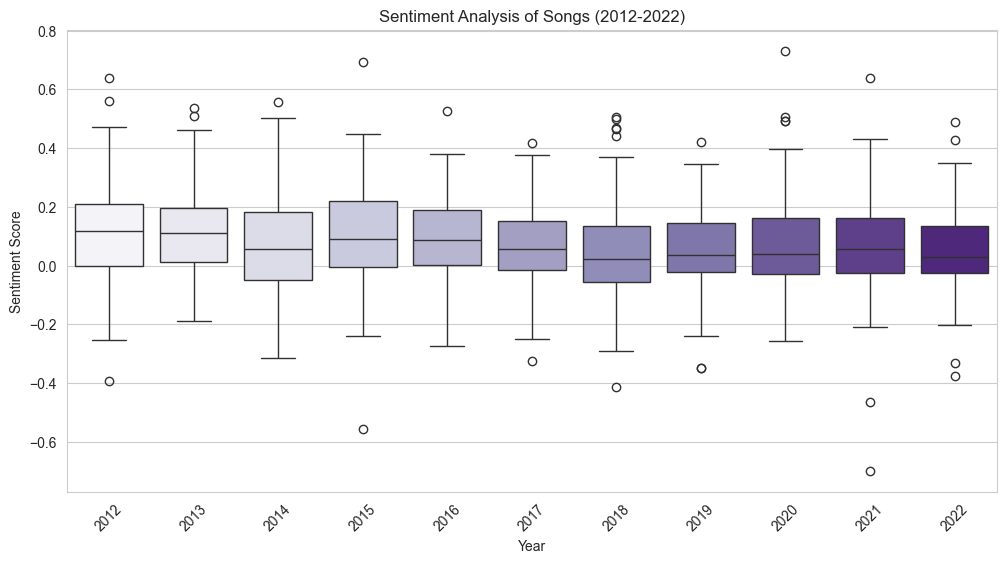

In [15]:
# Plot sentiment scores over time
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["Top100Year"], y=df["Sentiment"], palette="Purples")

plt.title("Sentiment Analysis of Songs (2012-2022)")
plt.xlabel("Year")
plt.ylabel("Sentiment Score")
plt.xticks(rotation=45)
plt.show()



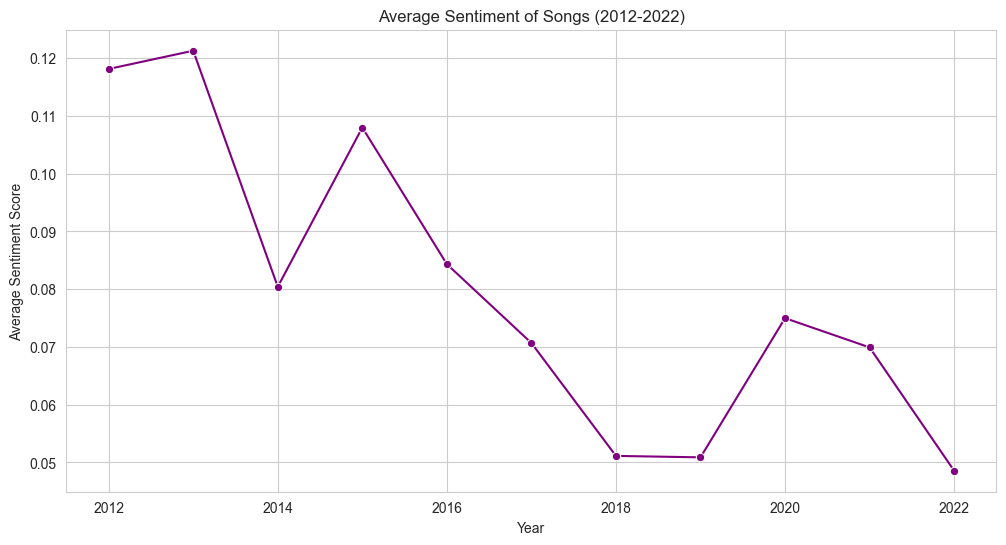


    Sentiment Analysis of Songs (2012-2022):
    1. Overall Sentiment Trend: Negative
       - Sentiment has decreased over time.
    2. Sentiment Score Change: -0.0696
       - Indicates a shift towards more negative lyrics.
    3. Sentiment Variance Trend: Decreased
       - Songs have become less diverse in emotional tone.
    4. Variance Change: -0.0099
       - Suggests lyrics are becoming more standardized.
    


In [16]:


def analyze_sentiment_trend(df):
    """
    Analyzes sentiment trends over time in a given dataset.
    Assumes dataset contains 'Top100Year' and 'Lyrics' columns.
    """
    # Compute sentiment scores if not present
    if "Sentiment" not in df.columns:
        df["Sentiment"] = df["Lyrics"].dropna().apply(lambda x: TextBlob(x).sentiment.polarity)
    
    # Compute average sentiment per year
    sentiment_trend = df.groupby("Top100Year")["Sentiment"].mean()
    sentiment_variance = df.groupby("Top100Year")["Sentiment"].var()
    
    # Plot sentiment trend
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=sentiment_trend.index, y=sentiment_trend.values, marker="o", color="purple")
    plt.title("Average Sentiment of Songs (2012-2022)")
    plt.xlabel("Year")
    plt.ylabel("Average Sentiment Score")
    plt.grid(True)
    plt.show()
    
    # Analyze trends
    sentiment_trend_change = sentiment_trend.iloc[-1] - sentiment_trend.iloc[0]
    variance_trend_change = sentiment_variance.iloc[-1] - sentiment_variance.iloc[0]
    
    # Generate theoretical insights
    insights = """
    Sentiment Analysis of Songs (2012-2022):
    1. Overall Sentiment Trend: {}
       - Sentiment has {} over time.
    2. Sentiment Score Change: {}
       - Indicates a shift towards more {} lyrics.
    3. Sentiment Variance Trend: {}
       - Songs have become {} diverse in emotional tone.
    4. Variance Change: {}
       - Suggests lyrics are becoming {}.
    """.format(
        "Positive" if sentiment_trend_change > 0 else "Negative",
        "increased" if sentiment_trend_change > 0 else "decreased",
        round(sentiment_trend_change, 4),
        "positive" if sentiment_trend_change > 0 else "negative",
        "Increased" if variance_trend_change > 0 else "Decreased",
        "more" if variance_trend_change > 0 else "less",
        round(variance_trend_change, 4),
        "more emotionally extreme" if variance_trend_change > 0 else "more standardized"
    )
    
    return insights

# Example usage
insights = analyze_sentiment_trend(df)
print(insights)


C:\Users\HOME\AppData\Local\Temp\ipykernel_15048\2001368355.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="Purples")


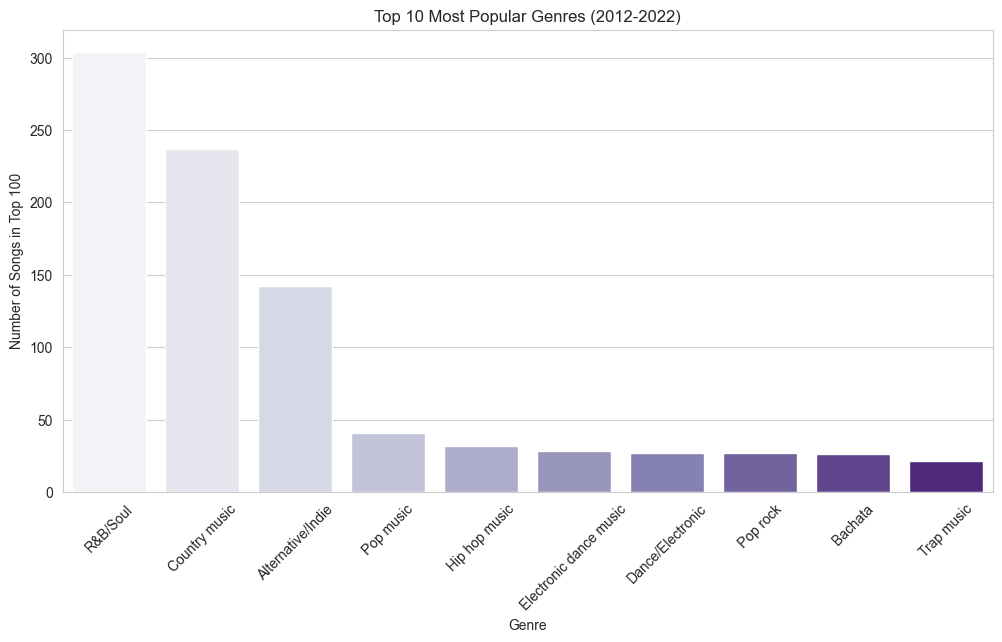

In [17]:
# Count of songs per genre
genre_counts = df["PrimaryGenre"].value_counts().head(10)  # Top 10 genres

# Plot genre popularity
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="Purples")

plt.title("Top 10 Most Popular Genres (2012-2022)")
plt.xlabel("Genre")
plt.ylabel("Number of Songs in Top 100")
plt.xticks(rotation=45)
plt.show()


In [18]:
import plotly.express as px

In [19]:
# Prepare data for alluvial diagram (sankey plot)
genre_year_df = df.groupby(["PrimaryGenre", "Top100Year"]).size().reset_index(name="Count")

# Create an alluvial diagram
fig = px.sunburst(genre_year_df, path=["PrimaryGenre", "Top100Year"], values="Count", 
                  title="Proportion of Popular Tracks by Genre and Release Year",
                  color="Top100Year", color_continuous_scale="Purples")

fig.show()


C:\Users\HOME\AppData\Local\Temp\ipykernel_15048\3876712272.py:9: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



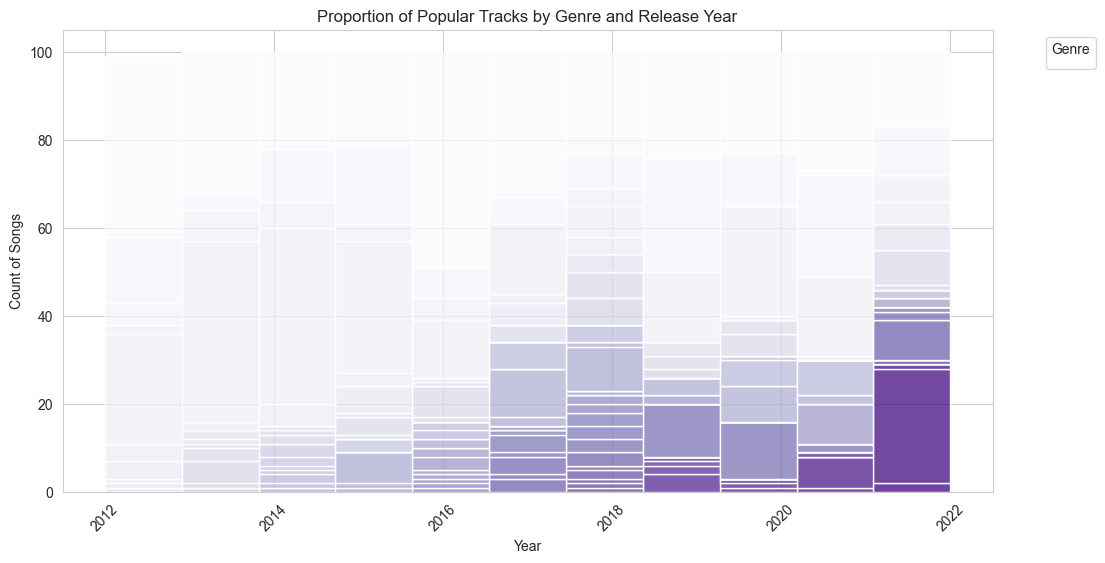

In [20]:
# Re-attempting the alluvial diagram using seaborn (alternative to Plotly)
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x="Top100Year", hue="PrimaryGenre", multiple="stack", palette="Purples", bins=11)

plt.title("Proportion of Popular Tracks by Genre and Release Year")
plt.xlabel("Year")
plt.ylabel("Count of Songs")
plt.xticks(rotation=45)
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [21]:
# Extract the primary genre (first listed genre in the Genre column)
df["PrimaryGenre"] = df["Genre"].apply(lambda x: x.split(",")[0] if pd.notna(x) else "Unknown")

# Group data by PrimaryGenre and Top100Year
genre_year_counts = df.groupby(["PrimaryGenre", "Top100Year"]).size().reset_index(name="Count")

# Import plotly for the alluvial diagram
import plotly.graph_objects as go

# Create unique labels (genres + years)
genres = list(genre_year_counts["PrimaryGenre"].unique())
years = list(genre_year_counts["Top100Year"].unique())
all_labels = genres + [str(year) for year in years]

# Mapping labels to indices for the Sankey diagram
genre_indices = {genre: i for i, genre in enumerate(genres)}
year_indices = {str(year): i + len(genres) for i, year in enumerate(years)}

# Creating source-target links for the Sankey diagram
source = []
target = []
values = []

for _, row in genre_year_counts.iterrows():
    source.append(genre_indices[row["PrimaryGenre"]])
    target.append(year_indices[str(row["Top100Year"])])
    values.append(row["Count"])

# Generate the alluvial diagram (Sankey plot)
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=all_labels,
    ),
    link=dict(
        source=source,
        target=target,
        value=values,
    )
))

fig.update_layout(title_text="Alluvial Diagram: Popular Tracks by Genre and Year", font_size=10)
fig.show()


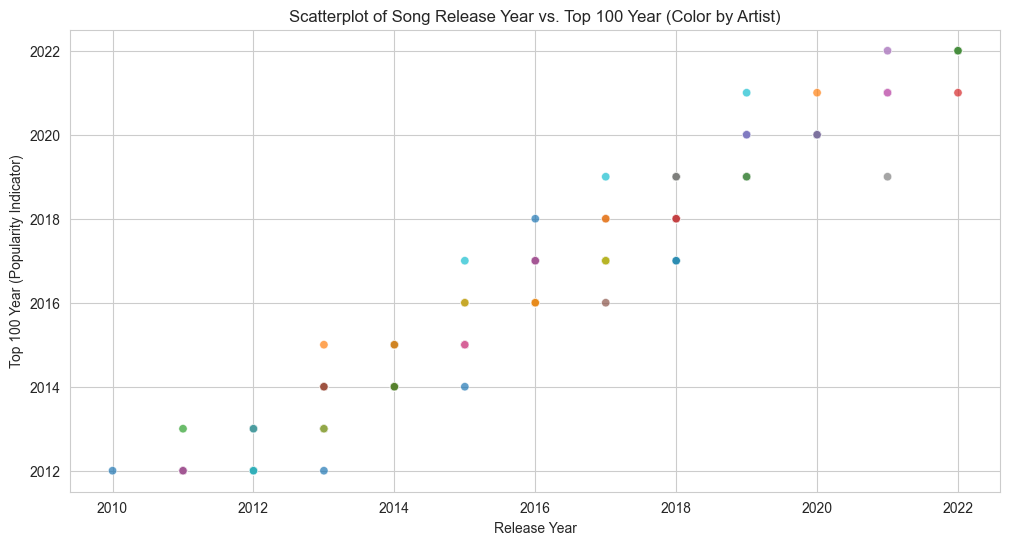

In [22]:
df_filtered = df.dropna(subset=["ReleaseYear", "Top100Year", "Artist"])

# Convert ReleaseYear and Top100Year to numeric types
df_filtered["ReleaseYear"] = pd.to_numeric(df_filtered["ReleaseYear"], errors='coerce')
df_filtered["Top100Year"] = pd.to_numeric(df_filtered["Top100Year"], errors='coerce')

# Sample a subset for better clarity in visualization
df_sampled = df_filtered.sample(n=200, random_state=42)  # Adjust number for clarity

# Scatter plot with Artist as color
plt.figure(figsize=(12, 6))
scatter = sns.scatterplot(
    x=df_sampled["ReleaseYear"],
    y=df_sampled["Top100Year"],
    hue=df_sampled["Artist"],
    palette="tab10",
    alpha=0.7,
    legend=False  # Too many artists; disabling legend for clarity
)

# Set labels and title
plt.xlabel("Release Year")
plt.ylabel("Top 100 Year (Popularity Indicator)")
plt.title("Scatterplot of Song Release Year vs. Top 100 Year (Color by Artist)")

# Show the plot
plt.show()

In [23]:

from wordcloud import WordCloud


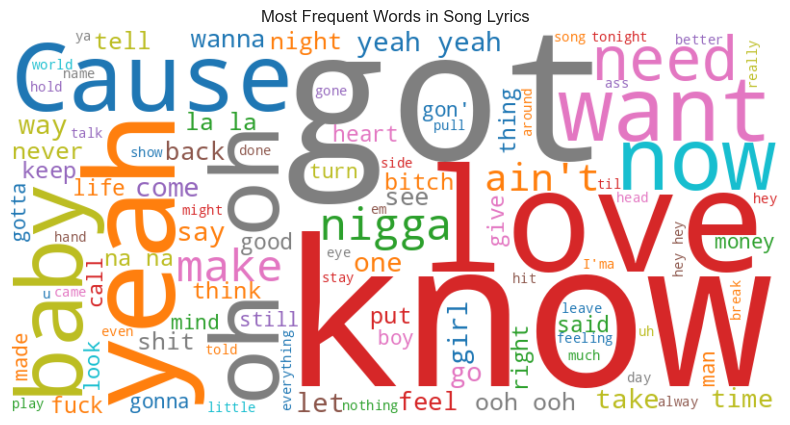

In [24]:
lyrics_text = " ".join(str(lyric) for lyric in df["Lyrics"].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="tab10",
                      max_words=100).generate(lyrics_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Words in Song Lyrics")
plt.show()

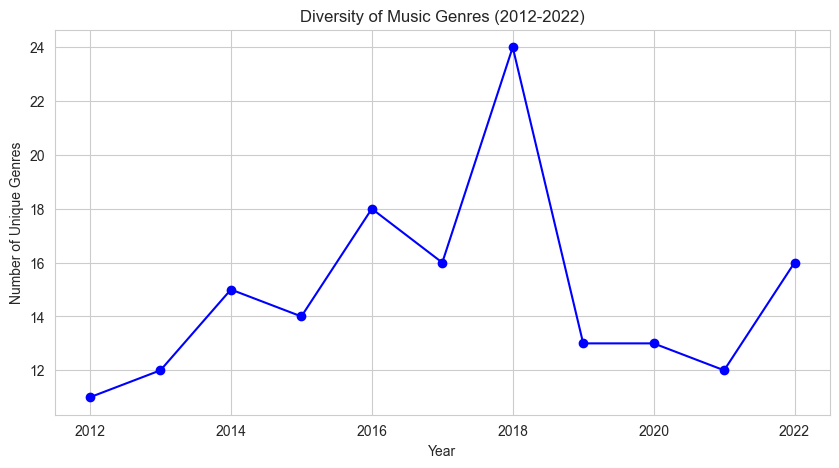

In [25]:
# Calculate genre diversity (number of unique genres per year)
genre_diversity = df.groupby("Top100Year")["PrimaryGenre"].nunique()

# Plot genre diversity trend
plt.figure(figsize=(10, 5))
plt.plot(genre_diversity.index, genre_diversity.values, marker="o", linestyle="-", color="b")
plt.xlabel("Year")
plt.ylabel("Number of Unique Genres")
plt.title("Diversity of Music Genres (2012-2022)")
plt.grid(True)
plt.show()


C:\Users\HOME\AppData\Local\Temp\ipykernel_15048\4212701545.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




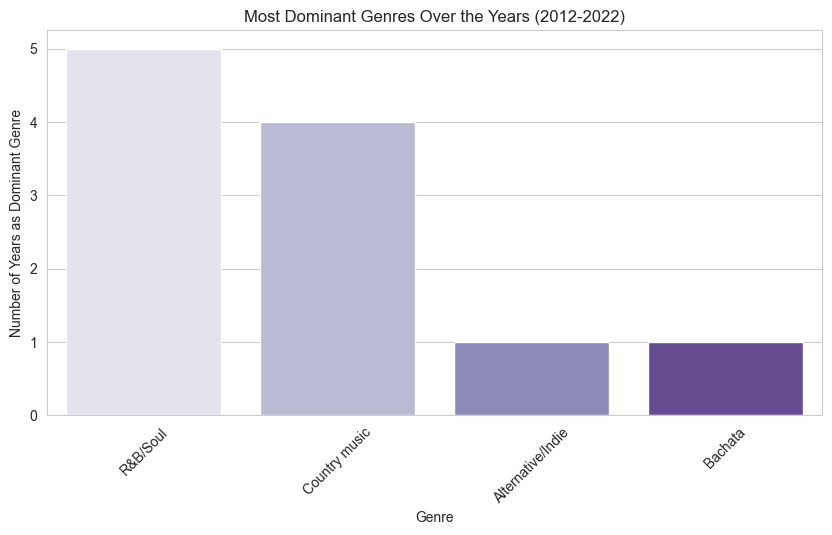

In [28]:
# Count occurrences of each genre per year
genre_counts = df.groupby("Top100Year")["PrimaryGenre"].value_counts().unstack()

# Identify the dominant genre for each year
dominant_genre = genre_counts.idxmax(axis=1)  # This returns a Series

# Count occurrences of each dominant genre across all years
dominant_genre_counts = dominant_genre.value_counts()

# Plot dominant genre trend
plt.figure(figsize=(10, 5))
sns.barplot(x=dominant_genre_counts.index, y=dominant_genre_counts.values, palette="Purples")

plt.title("Most Dominant Genres Over the Years (2012-2022)")
plt.xlabel("Genre")
plt.ylabel("Number of Years as Dominant Genre")
plt.xticks(rotation=45)
plt.show()
